In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def find_chess_board(img):
  original_image = img
  copy_image = img.copy()

  # greyscale
  grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  cv2_imshow(grey)

  # find Canny edges
  edges = cv2.Canny(grey, 50, 200)
  cv2_imshow(edges)

  # find contours, sort in reversed order and get largest contour
  contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
  largest_contour = sorted_contours[0]

  # draw largest contour on image copy
  cv2.drawContours(copy_image, largest_contour, -1, (255,0,255),10)
  cv2_imshow(copy_image)
  
  # crop image
  x, y, w, h = cv2.boundingRect(largest_contour)
  cropped_image = original_image[y:y+h, x:x+w]
  cv2_imshow(cropped_image)

  # resize image to fit dataset images dimensions
  resized_image = cv2.resize(cropped_image, (410, 410))
  cv2_imshow(resized_image)

  return resized_image

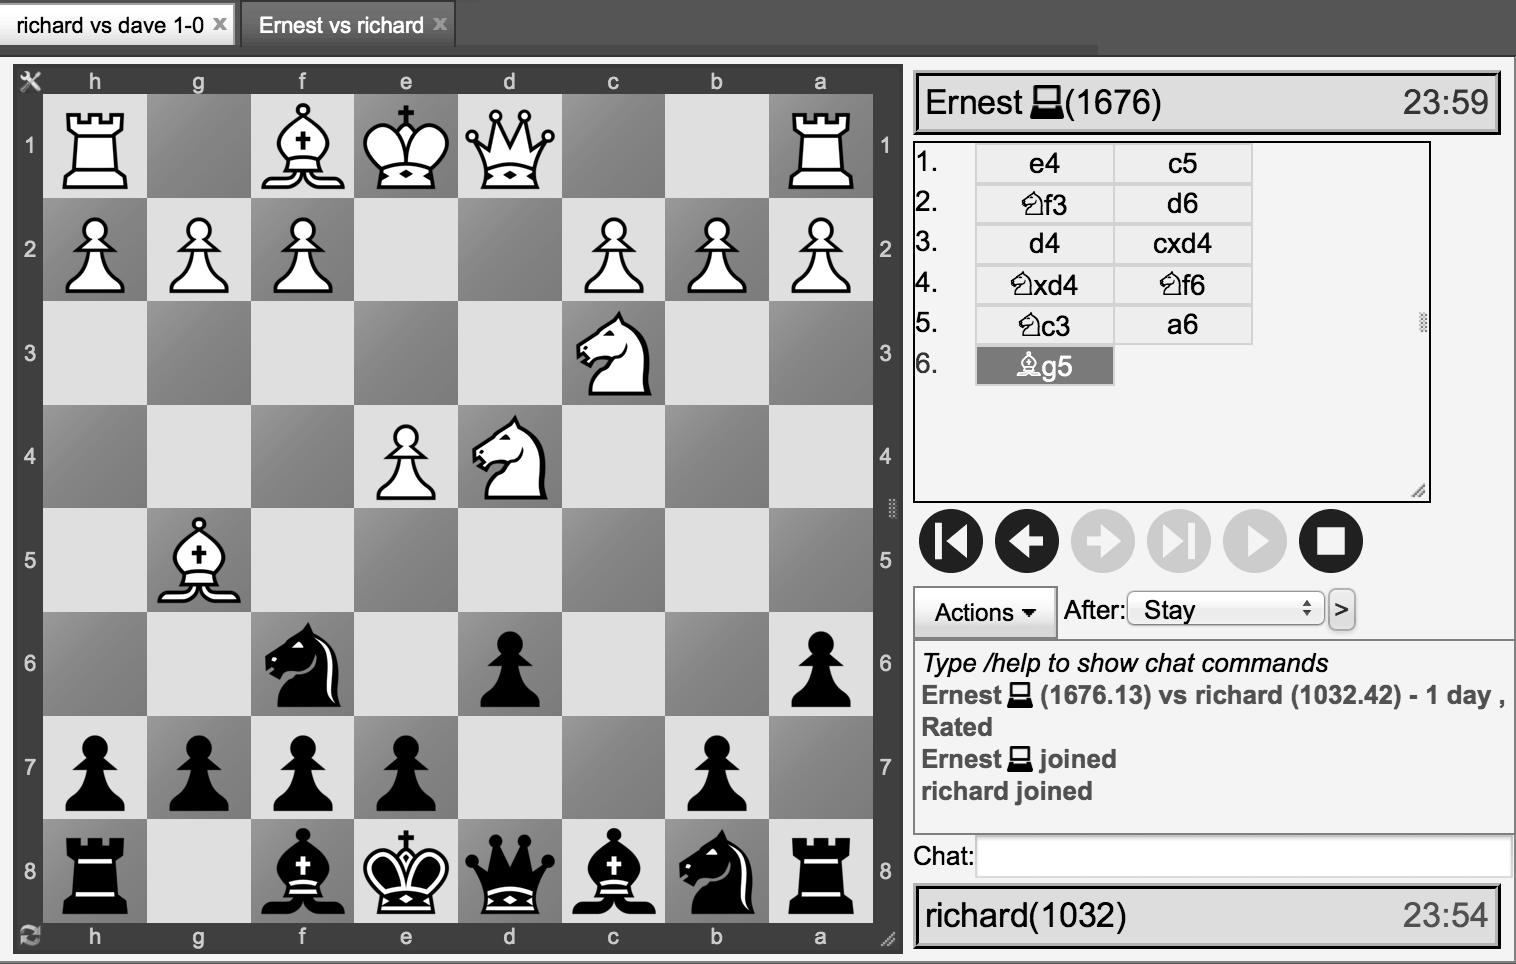

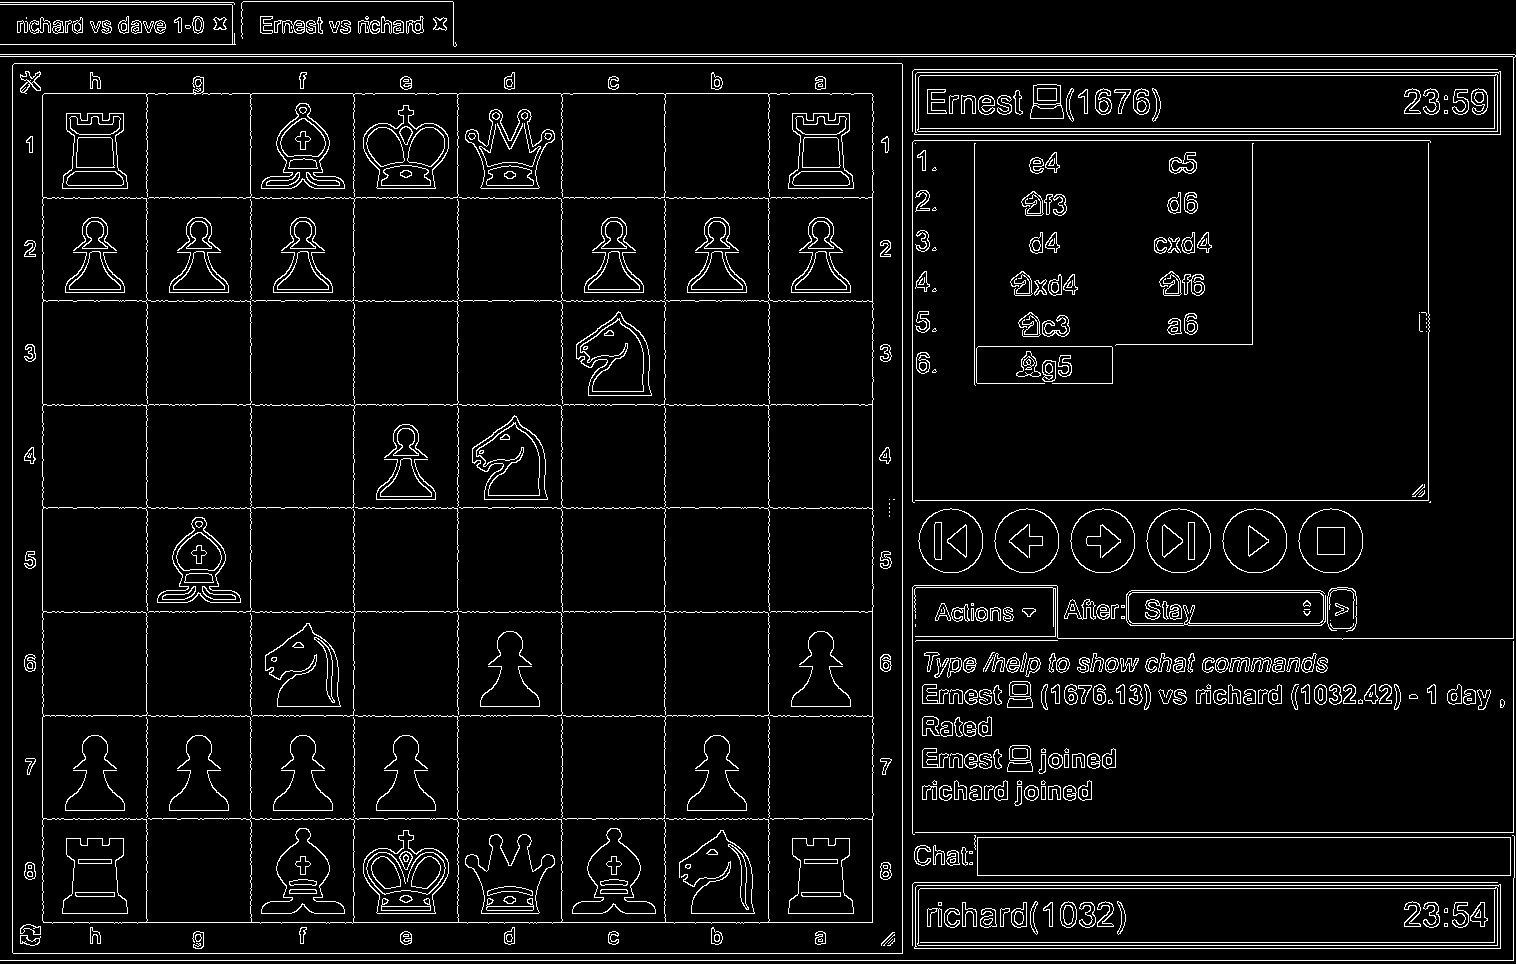

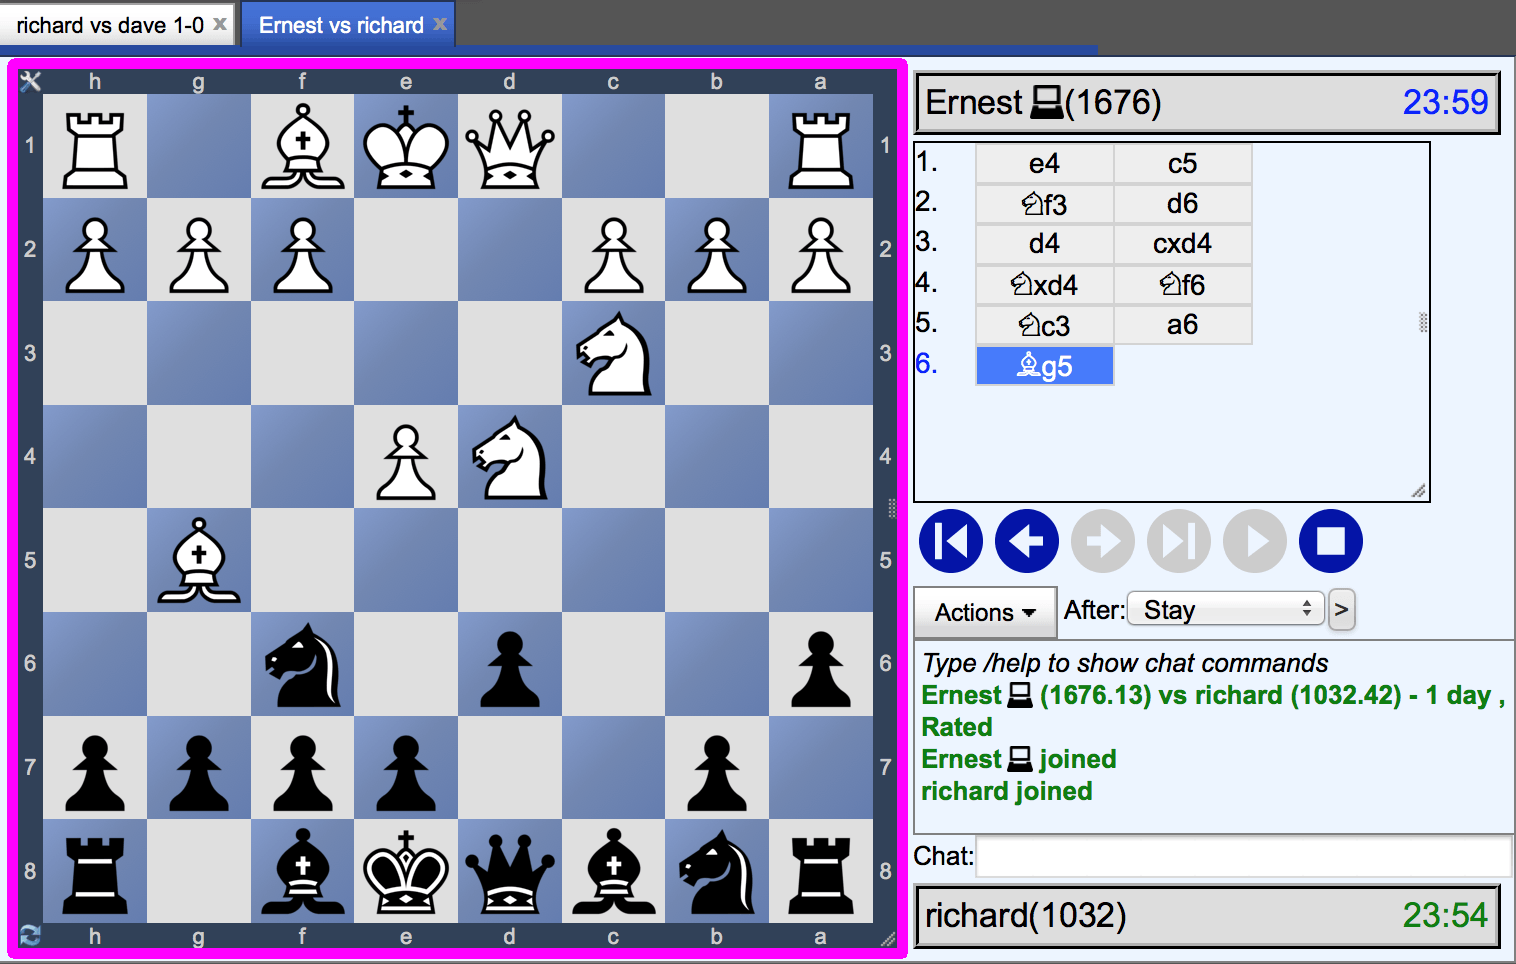

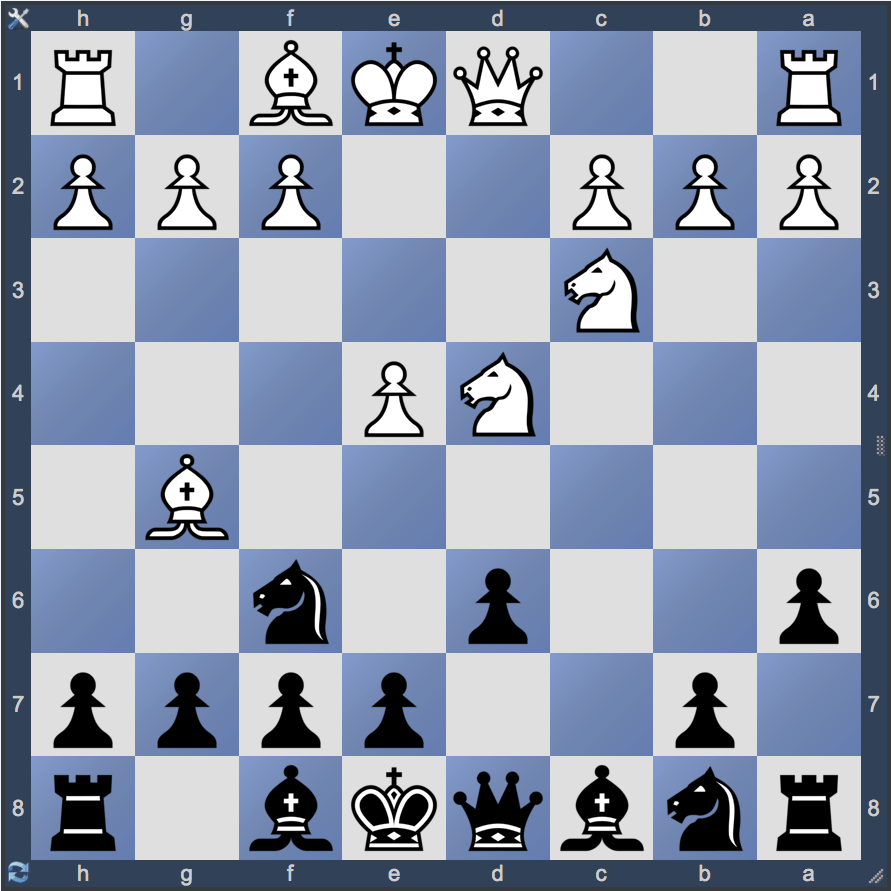

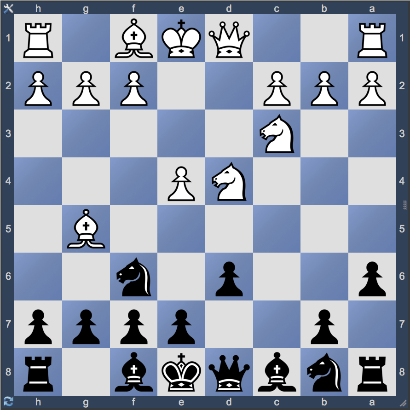

In [5]:
img = cv2.imread("/content/drive/MyDrive/ChessProject/SimpleImages/s2.png")
test = find_chess_board(img)